# Inspeção dos dados com Python

- Fundamentos da Análise de dados
- Introdução e Contextualização (Objetivo da análise)
- Inspeção dos Dados
- Análise Preliminar (Estatística Descritiva)
- Análise Unidimensional
- Variáveis Categóricas
- Variáveis Numéricas
- Análise Bidimensional
- Relações entre variáveis
- Análise Multidimensional
- Análise de Correlação
- Pearson

**Fonte: Polícia Rodoviária Federal**
- https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-da-prf

In [1]:
### Mapeando bibliotecas necessárias para o projeto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Vamos abrir os dados que serão analisados
Verificar documentação dos metodos que vão utilizar:

https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [2]:
df_prf_oco_01 = pd.read_csv('Dados_PRF_2023.csv',
                            delimiter=';',
                            encoding='ISO-8859-1' #'utf-8' 'latin1'
                            )
df_prf_oco_01.shape

(32440, 30)

In [3]:
df = pd.read_csv(
    filepath_or_buffer='Dados_PRF_2023.csv',   # Caminho ou objeto similar a arquivo que representa o CSV.
    sep=';',              # Delimitador a ser usado. Padrão é ','.
    # delimiter=';',       # Alias para sep.
    # header='infer',       # Linha a ser usada como nome das colunas. Padrão é 'infer', o que significa que pandas tentará inferir automaticamente.
    # names=None,           # Lista de nomes de colunas a serem usadas.
    # index_col=None,       # Coluna(s) a serem usadas como índice (linha) do DataFrame.
    # usecols=None,         # Colunas a serem lidas do CSV.
    # dtype=None,           # Tipo de dados para colunas.
    # engine=None,          # Parser a ser usado. Pode ser 'c' (padrão) ou 'python'.
    # converters=None,      # Dicionário de funções para converter valores em determinadas colunas.
    # true_values=None,     # Sequência de valores a serem tratados como True.
    # false_values=None,    # Sequência de valores a serem tratados como False.
    # skipinitialspace=False, # Pula espaços após o delimitador.
    # skiprows=None,        # Número de linhas a serem puladas no início do arquivo.
    # nrows=None,           # Número de linhas a serem lidas do arquivo.
    # na_values=None,       # Sequência de valores a serem tratados como NaN.
    # keep_default_na=True, # Se os valores padrão devem ser mantidos como NaN.
    # na_filter=True,       # Detectar valores faltantes (NaN).
    # verbose=False,        # Imprimir informações adicionais, como o número de valores faltantes.
    # skip_blank_lines=True, # Pular linhas em branco.
    # parse_dates=False,    # Colunas a serem analisadas como datas.
    # infer_datetime_format=False, # Inferir o formato da data.
    # keep_date_col=False,  # Se True, mantém as colunas originais que foram analisadas como datas.
    # date_parser=None,     # Função a ser usada para analisar datas.
    # dayfirst=False,       # Tratar o primeiro valor na data como dia (DD/MM/YYYY).
    # cache_dates=True,     # Cache de objetos de data únicos.
    # iterator=False,       # Retornar um objeto TextFileReader para iteração.
    # chunksize=None,       # Tamanho das partes a serem lidas do arquivo.
    # compression='infer',  # Tipo de compressão do arquivo. Padrão é 'infer', que tenta inferir a partir da extensão do arquivo (como '.gz' ou '.zip').
    # thousands=None,       # Caractere a ser reconhecido como separador de milhar (por exemplo, ',' em "2,000").
    # decimal='.',          # Caractere a ser reconhecido como separador decimal (por exemplo, ',' em "2,5").
    # lineterminator=None,  # Caractere que termina a linha no arquivo.
    # quotechar='"',        # Caractere usado para citar campos.
    # quoting=0,            # Regras de citação. Pode ser 0 (minimal), 1 (all), 2 (non-numeric), ou 3 (none). Padrão é 0.
    # escapechar=None,      # Caractere de escape.
    # comment=None,         # Caractere(s) que começam um comentário.
    encoding='ISO-8859-1',        # Codificação a ser usada.
    # dialect=None,         # Dialeto SQL a ser usado.
    # error_bad_lines=True, # Se linhas com muitos campos (em relação ao esperado) devem gerar exceção (True) ou serem puladas (False).
    # warn_bad_lines=True,  # Se deve imprimir um aviso para linhas com muitos campos.
    # delim_whitespace=False, # Usar espaços em branco (espaço e tabulação) como delimitador.
    # low_memory=True,      # Internamente fragmenta o arquivo para economizar memória.
    # memory_map=False,     # Mapeia o arquivo em memória para leitura. Pode ser útil para arquivos muito grandes.
    # float_precision=None  # Especifica qual conversor o C deve usar para strings de ponto flutuante.
 )

df.shape

(32440, 30)

In [4]:
# Visualizar as 5 primeiras linhas do arquivo
df_prf_oco_01.head()

id data_inversa dia_semana   horario  uf     br     km  \
0  496519   2023-01-01    domingo  02:00:00  ES  101.0    114   
1  496543   2023-01-01    domingo  03:40:00  SP  116.0  113,1   
2  496590   2023-01-01    domingo  01:40:00  MT  163.0   1112   
3  496610   2023-01-01    domingo  10:40:00  PR  376.0  314,8   
4  496659   2023-01-01    domingo  14:55:00  MG  116.0  569,4   

           municipio                            causa_acidente  \
0          SOORETAMA            Ausência de reação do condutor   
1            TAUBATE             Entrada inopinada do pedestre   
2  GUARANTA DO NORTE  Reação tardia ou ineficiente do condutor   
3         ORTIGUEIRA                   Velocidade Incompatível   
4           MANHUACU         Acumulo de água sobre o pavimento   

               tipo_acidente  ... feridos_graves ilesos ignorados feridos  \
0  Saída de leito carroçável  ...              0      0         0       1   
1  Atropelamento de Pedestre  ...              0      0         4       0   
2                 Tombamento  ...              1      0         0       1   
3                 Tombamento  ...              0      1         0       0   
4            Colisão frontal  ...              2      1         0       2   

  veiculos      latitude     longitude  regional  delegacia             uop  
0        1  -19,09484877  -40,05095848   SPRF-ES   DEL04-ES  UOP01-DEL04-ES  
1        1   -23,0445658  -45,58259814   SPRF-SP   DEL02-SP  UOP02-DEL02-SP  
2        1   -9,70020602  -54,87588757   SPRF-MT   DEL06-MT  UOP03-DEL06-MT  
3        1    -23,985512    -51,083555   SPRF-PR   DEL07-PR  UOP02-DEL07-PR  
4        2  -20,10007457  -42,17884091   SPRF-MG   DEL06-MG  UOP03-DEL06-MG  

[5 rows x 30 columns]

In [5]:
# Visualizar as últimas linhas do arquivo
df_prf_oco_01.tail()

id data_inversa     dia_semana   horario  uf     br     km  \
32435  536157   2023-06-25        domingo  05:10:00  SP  101.0     41   
32436  536172   2023-06-23    sexta-feira  02:30:00  RS  386.0  279,4   
32437  536173   2023-06-24         sábado  13:40:00  PR  163.0  133,3   
32438  536265   2023-01-09  segunda-feira  10:00:00  MG  267.0   80,5   
32439  536330   2023-06-02    sexta-feira  15:30:00  SC  470.0     60   

                      municipio                    causa_acidente  \
32435                   UBATUBA  Ingestão de álcool pelo condutor   
32436        SAO JOSE DO HERVAL                 Condutor Dormindo   
32437  CAPITAO LEONIDAS MARQUES                  Retorno proibido   
32438              JUIZ DE FORA                 Condutor Dormindo   
32439                  BLUMENAU                  Retorno proibido   

                   tipo_acidente  ... feridos_graves ilesos ignorados feridos  \
32435                 Tombamento  ...              0      1         0       0   
32436  Saída de leito carroçável  ...              1      0         0       1   
32437        Colisão transversal  ...              0      2         0       3   
32438  Saída de leito carroçável  ...              0      1         0       0   
32439        Colisão transversal  ...              0      0         1       1   

      veiculos      latitude     longitude  regional  delegacia  \
32435        1  -23,41971433   -45,0428663   SPRF-SP   DEL06-SP   
32436        1  -29,02337709  -52,31543541   SPRF-RS   DEL04-RS   
32437        2  -25,55452378  -53,58756077   SPRF-PR   DEL05-PR   
32438        1  -21,75478617  -43,21241781   SPRF-MG   DEL05-MG   
32439        2  -26,87957612   -49,1716308   SPRF-SC   DEL04-SC   

                  uop  
32435  UOP01-DEL06-SP  
32436  UOP03-DEL04-RS  
32437  UOP05-DEL05-PR  
32438  UOP01-DEL05-MG  
32439  UOP01-DEL04-SC  

[5 rows x 30 columns]

#### Carregando Metadados

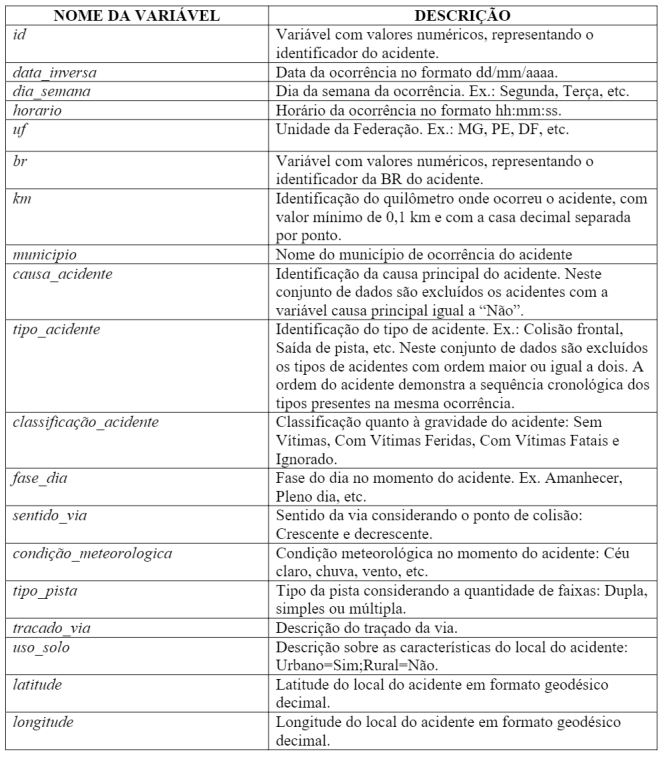

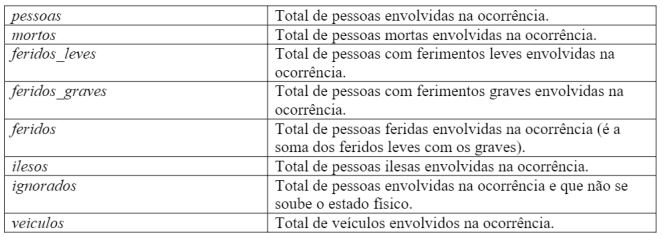

#### Vamos entender os tipos de variáveis

### 1. Variáveis Numéricas:

**Variáveis numéricas** representam medidas ou contagens quantitativas. Elas têm valores numéricos e podem ser somadas, subtraídas etc. Variáveis numéricas podem ser de dois tipos:

- **Contínuas:** Podem assumir qualquer valor dentro de um intervalo específico. Exemplos incluem altura, peso, temperatura, e distância.
  
- **Discretas:** Só podem assumir valores inteiros, geralmente como resultado de uma contagem. Exemplos incluem o número de filhos de uma pessoa ou o número de casas em uma rua.

### 2. Variáveis Categóricas:

**Variáveis categóricas** representam categorias ou rótulos. Elas têm um número limitado e fixo de diferentes valores ou categorias. Variáveis categóricas são subdivididas em:

- **Nominais:** Não possuem uma ordem ou ranking inerente. Exemplos incluem cores (vermelho, azul, verde), gênero (masculino, feminino) e tipo de material (madeira, metal, plástico). Não faz sentido dizer que uma categoria é "maior" ou "menor" que outra.

- **Ordinais:** Possuem uma ordem clara e significativa, mas a distância entre as categorias não é conhecida. Exemplos incluem níveis de educação (ensino fundamental, médio, superior), escalas de satisfação (insatisfeito, neutro, satisfeito) e tamanhos de roupas (P, M, G). Aqui, faz sentido dizer que uma categoria precede a outra, mas não podemos quantificar o "quanto" uma é maior que a outra.



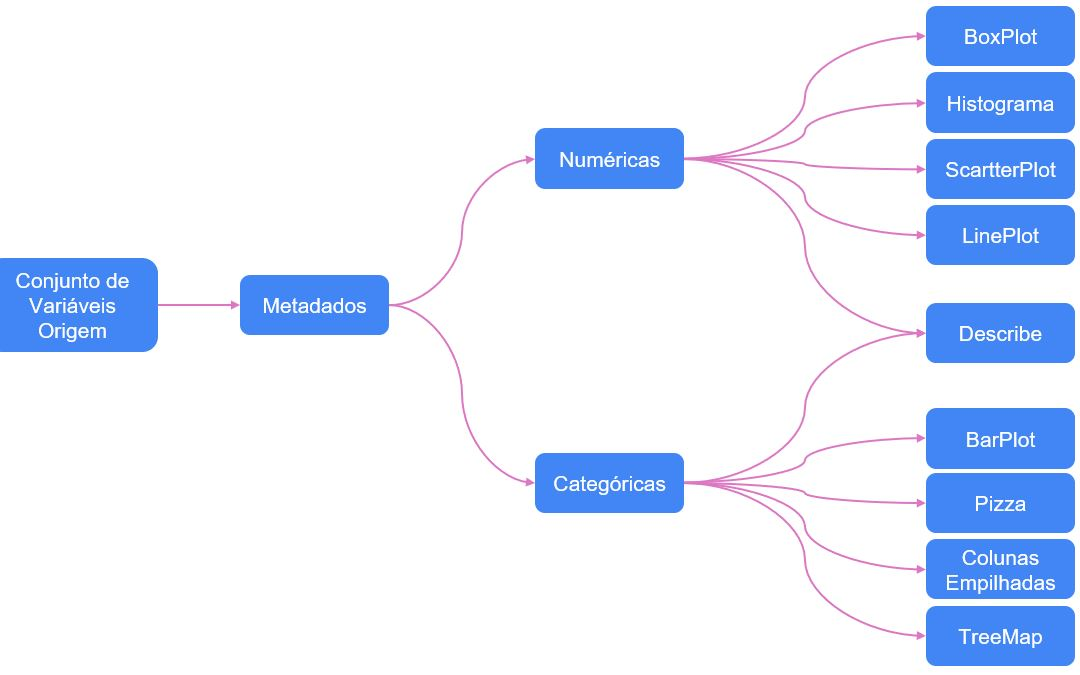

In [6]:
# verificando o tipo dos dados
df_prf_oco_01.dtypes

id                          int64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           

**1.Valores Nulos:**

- O que são valores nulos?
- Por que eles ocorrem? (Erros de entrada, falhas na coleta de dados, etc.)
- Por que é importante tratar valores nulos?

**2. Identificação de Valores Nulos em Pandas:**

- Uso do método .isnull() e .notnull() para identificar valores nulos.
- Uso do método .info() para obter uma visão geral dos valores nulos em um DataFrame.
- Visualização de valores nulos com o método .sum() para contá-los por coluna.

**3. Tratamento de Valores Nulos:**
- Exclusão:
- Uso do método .dropna() para excluir linhas ou colunas com valores nulos.
Discussão sobre quando é apropriado excluir dados.
Preenchimento:

- Uso do método .fillna() para preencher valores nulos.
- Estratégias de preenchimento:
- Preencher com zero, média, mediana, moda, etc.
- Preencher com o valor anterior ou próximo (usando métodos 'ffill' e 'bfill').
Discussão sobre escolher a estratégia mais apropriada.

In [9]:
list(df_prf_oco_01.columns)

['id',
 'data_inversa',
 'dia_semana',
 'horario',
 'uf',
 'br',
 'km',
 'municipio',
 'causa_acidente',
 'tipo_acidente',
 'classificacao_acidente',
 'fase_dia',
 'sentido_via',
 'condicao_metereologica',
 'tipo_pista',
 'tracado_via',
 'uso_solo',
 'pessoas',
 'mortos',
 'feridos_leves',
 'feridos_graves',
 'ilesos',
 'ignorados',
 'feridos',
 'veiculos',
 'latitude',
 'longitude',
 'regional',
 'delegacia',
 'uop']

In [10]:
def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

# Testando a função com o dataframe dados_prf_2023
metadata_df = generate_metadata(df_prf_oco_01)
metadata_df

nome_variavel     tipo  qt_nulos  percent_nulos  cardinalidade
0                       id    int64         0           0.00          32440
1                 veiculos    int64         0           0.00             12
2                  feridos    int64         0           0.00             28
3                ignorados    int64         0           0.00             10
4                   ilesos    int64         0           0.00             43
5           feridos_graves    int64         0           0.00             14
6            feridos_leves    int64         0           0.00             24
7                   mortos    int64         0           0.00              8
8                  pessoas    int64         0           0.00             48
9                       br  float64        78           0.24            114
10                regional   object         3           0.01             28
11               longitude   object         0           0.00          20401
12                latitude   object         0           0.00          20402
13                uso_solo   object         0           0.00              2
14             tracado_via   object         0           0.00             10
15              tipo_pista   object         0           0.00              3
16  condicao_metereologica   object         0           0.00              9
17             sentido_via   object         0           0.00              3
18                fase_dia   object         0           0.00              4
19  classificacao_acidente   object         0           0.00              3
20           tipo_acidente   object         0           0.00             16
21          causa_acidente   object         0           0.00             71
22               municipio   object         0           0.00           1705
23                      km   object        78           0.24           6076
24                      uf   object         0           0.00             27
25                 horario   object         0           0.00           1307
26              dia_semana   object         0           0.00              7
27            data_inversa   object         0           0.00            181
28               delegacia   object       302           0.93            146
29                     uop   object        18           0.06            392

In [11]:
df_prf_oco_01.shape

(32440, 30)

In [13]:
metadata_df.to_csv('/content/drive/Shareddrives/PoD Academy/Cursos/Formação em Ciência de Dados/dados/PRF/metadados_prf.csv')

# Estatística Descritiva
A estatística descritiva fornece um resumo conciso das principais características dos dados. Ela inclui medidas de tendência central, como média, mediana e moda, bem como medidas de dispersão, como variância e desvio padrão. Ao oferecer uma visão geral dos dados, a estatística descritiva ajuda os analistas a entender a distribuição e a variabilidade das variáveis em análise.


**Média**:

Se você tem um conjunto de números \( $x_1, x_2, \ldots, x_n $\), a média (ou valor esperado) é dada por:


$\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$


**Desvio Padrão**:

O desvio padrão para uma população é:

$\sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$

E o desvio padrão para uma amostra é:

$s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2}$



In [15]:
#  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Estatística descritiva apenas para numéricas
df_prf_oco_01.describe()

id            br       pessoas        mortos  feridos_leves  \
count   32440.000000  32362.000000  32440.000000  32440.000000   32440.000000   
mean   515154.342170    209.846147      2.457614      0.081936       0.874723   
std     10528.741985    129.455175      2.166629      0.325561       1.083875   
min    496506.000000     10.000000      1.000000      0.000000       0.000000   
25%    506122.750000    101.000000      1.000000      0.000000       0.000000   
50%    515290.500000    155.000000      2.000000      0.000000       1.000000   
75%    524296.250000    324.000000      3.000000      0.000000       1.000000   
max    536330.000000    495.000000     65.000000      7.000000      61.000000   

       feridos_graves        ilesos     ignorados       feridos      veiculos  
count    32440.000000  32440.000000  32440.000000  32440.000000  32440.000000  
mean         0.277435      1.067109      0.156412      1.152158      1.664365  
std          0.617148      1.758439      0.443078      1.194990      0.720026  
min          0.000000      0.000000      0.000000      0.000000      1.000000  
25%          0.000000      0.000000      0.000000      1.000000      1.000000  
50%          0.000000      1.000000      0.000000      1.000000      2.000000  
75%          0.000000      1.000000      0.000000      1.000000      2.000000  
max         29.000000     58.000000     14.000000     62.000000     12.000000

In [16]:
# Estatística descritiva completa
df_prf_oco_01.describe(include='all')

id data_inversa dia_semana   horario     uf            br  \
count    32440.000000        32440      32440     32440  32440  32362.000000   
unique            NaN          181          7      1307     27           NaN   
top               NaN   2023-06-11    domingo  18:00:00     MG           NaN   
freq              NaN          248       5375       470   4234           NaN   
mean    515154.342170          NaN        NaN       NaN    NaN    209.846147   
std      10528.741985          NaN        NaN       NaN    NaN    129.455175   
min     496506.000000          NaN        NaN       NaN    NaN     10.000000   
25%     506122.750000          NaN        NaN       NaN    NaN    101.000000   
50%     515290.500000          NaN        NaN       NaN    NaN    155.000000   
75%     524296.250000          NaN        NaN       NaN    NaN    324.000000   
max     536330.000000          NaN        NaN       NaN    NaN    495.000000   

           km municipio                            causa_acidente  \
count   32362     32440                                     32440   
unique   6076      1705                                        71   
top         1  BRASILIA  Reação tardia ou ineficiente do condutor   
freq      152       464                                      4672   
mean      NaN       NaN                                       NaN   
std       NaN       NaN                                       NaN   
min       NaN       NaN                                       NaN   
25%       NaN       NaN                                       NaN   
50%       NaN       NaN                                       NaN   
75%       NaN       NaN                                       NaN   
max       NaN       NaN                                       NaN   

           tipo_acidente  ... feridos_graves        ilesos     ignorados  \
count              32440  ...   32440.000000  32440.000000  32440.000000   
unique                16  ...            NaN           NaN           NaN   
top     Colisão traseira  ...            NaN           NaN           NaN   
freq                6179  ...            NaN           NaN           NaN   
mean                 NaN  ...       0.277435      1.067109      0.156412   
std                  NaN  ...       0.617148      1.758439      0.443078   
min                  NaN  ...       0.000000      0.000000      0.000000   
25%                  NaN  ...       0.000000      0.000000      0.000000   
50%                  NaN  ...       0.000000      1.000000      0.000000   
75%                  NaN  ...       0.000000      1.000000      0.000000   
max                  NaN  ...      29.000000     58.000000     14.000000   

             feridos      veiculos      latitude     longitude  regional  \
count   32440.000000  32440.000000         32440         32440     32437   
unique           NaN           NaN         20402         20401        28   
top              NaN           NaN  -27,59193546  -48,61824557   SPRF-MG   
freq             NaN           NaN            47            47      4230   
mean        1.152158      1.664365           NaN           NaN       NaN   
std         1.194990      0.720026           NaN           NaN       NaN   
min         0.000000      1.000000           NaN           NaN       NaN   
25%         1.000000      1.000000           NaN           NaN       NaN   
50%         1.000000      2.000000           NaN           NaN       NaN   
75%         1.000000      2.000000           NaN           NaN       NaN   
max        62.000000     12.000000           NaN           NaN       NaN   

        delegacia             uop  
count       32138           32422  
unique        146             392  
top      DEL01-PR  UOP01-DEL01-SP  
freq         1170             542  
mean          NaN             NaN  
std           NaN             NaN  
min           NaN             NaN  
25%           NaN             NaN  
50%           NaN             NaN  
75%           NaN             NaN  
max    

- Quantidade de Observações: Existem 32.440 registros no conjunto de dados. Isso indica uma quantidade considerável de incidentes registrados.

- Valores Nulos: Algumas colunas, como br e km, têm menos observações do que o total de registros, indicando a presença de valores nulos.

- Incidentes por Dia: O dia com mais incidentes é o "domingo" (5.375 registros), o que pode indicar que os finais de semana têm uma frequência mais alta de incidentes ou que as pessoas viajam mais nesse dia.

- Localização dos Incidentes: A maioria dos incidentes ocorre em Minas Gerais (MG), com 4.234 registros.

- Causa mais Comum: A causa mais frequente de incidentes é a "Reação tardia ou ineficiente do condutor", ocorrendo 4.672 vezes.

- Tipo de Acidente mais Comum: A "Colisão traseira" é o tipo mais comum de acidente, ocorrendo 6.179 vezes.

- Quantidade de Veículos Envolvidos: Em média, cada incidente envolve aproximadamente 1,66 veículos.

- Vítimas: A média de feridos por incidente é de 1,15, com um máximo de 62 feridos em um único incidente. Além disso, a média de feridos graves por incidente é de 0,28.

- Distribuição de Incidentes ao Longo do Ano: O dia com o maior número de incidentes registrados é "2023-06-11", com 248 incidentes.

- Diversidade de Causas e Tipos: Há 71 causas diferentes de acidentes e 16 tipos diferentes de acidentes listados no conjunto de dados.




**Mediana**

A mediana é uma medida de tendência central que representa o valor do meio de um conjunto de dados quando os dados são organizados em ordem crescente ou decrescente. Ela divide o conjunto de dados em duas metades iguais, onde metade dos valores é menor ou igual à mediana e metade é maior ou igual à mediana.

Como calcular a mediana:

1. **Ordene o Conjunto de Dados**: Primeiro, organize seus dados em ordem crescente.

2. **Encontre o Valor do Meio**:
   - **Conjuntos de Dados Ímpares**: Se o número de observações $( n)$ é ímpar, a mediana é o valor central. Matematicamente, ela é o valor na posição $(\frac{n+1}{2})$.
   - **Conjuntos de Dados Pares**: Se $( n)$ é par, a mediana é a média dos dois valores centrais. Estes estão nas posições $ \frac{n}{2}$ e $\frac{n}{2} + 1 $. Portanto, a mediana é a média destes dois valores.

**Exemplo**:

- Conjunto de dados ímpar: $( [1, 3, 5, 7, 9] )  $
  Aqui, $( n = 5 )$ (ímpar), então a mediana é o terceiro valor, que é 5.
  
- Conjunto de dados par: $( [1, 3, 5, 7, 9, 11] )  $
  Aqui, $( n = 6 ) $(par), então a mediana é a média dos terceiro e quarto valores: $( \frac{5 + 7}{2} = 6 )$.

Se você tiver um conjunto de dados e quiser calcular a mediana usando Python, pode usar a função `median()` da biblioteca `numpy`:




**Quartis**

Os quartis são medidas de dispersão que dividem um conjunto de dados em quatro partes iguais. Eles são extremamente úteis para entender a distribuição de um conjunto de dados, especialmente quando o conjunto de dados possui outliers ou quando se deseja uma compreensão mais granular da dispersão dos dados em comparação à mediana sozinha.

1. **Primeiro Quartil (Q1)**: Também conhecido como quartil inferior, é o número que divide os 25% primeiros de um conjunto de dados. Em outras palavras, 25% dos pontos de dados são menores ou iguais a Q1.

2. **Segundo Quartil (Q2)**: É a mediana do conjunto de dados, dividindo-o ao meio. 50% dos pontos de dados são menores ou iguais a Q2. Portanto, Q2 é o mesmo que a mediana.

3. **Terceiro Quartil (Q3)**: Também conhecido como quartil superior, é o número que divide os 75% primeiros do conjunto de dados. Isso significa que 75% dos pontos de dados são menores ou iguais a Q3.

4. **Intervalo Interquartil (IIQ)**: É a diferença entre o terceiro e o primeiro quartil e representa a variação da metade central dos dados.  
   $ IIQ = Q3 - Q1 $

**Exemplo**:

Vamos supor que temos o seguinte conjunto de dados ordenado:

$[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]$

- **Q1**: O valor que divide o primeiro quarto dos dados é 3 (pois existe um total de 10 números e 2,5 é o ponto de divisão para 25%, então pegamos a média entre o segundo e o terceiro número).
- **Q2 (Mediana)**: Como há 10 números, a mediana é a média entre o quinto e o sexto número, que é 5,5.
- **Q3**: O valor que divide os primeiros três quartos dos dados é 7,5 (pois 7,5 é o ponto de divisão para 75%, então pegamos a média entre o sétimo e o oitavo número).
- **IIQ**: $ Q3 - Q1 = 7,5 - 3 = 4,5 $

Assim, para esse conjunto de dados, temos:

- Q1 = 3
- Q2 = 5,5
- Q3 = 7,5
- IIQ = 4,5

Os quartis são uma ferramenta valiosa em estatística e análise de dados, pois proporcionam uma visão mais detalhada da distribuição de um conjunto de dados, permitindo que os analistas compreendam não apenas a tendência central (mediana), mas também a dispersão e a presença de outliers.

In [17]:
df_prf_oco_01.head()

id data_inversa dia_semana   horario  uf     br     km  \
0  496519   2023-01-01    domingo  02:00:00  ES  101.0    114   
1  496543   2023-01-01    domingo  03:40:00  SP  116.0  113,1   
2  496590   2023-01-01    domingo  01:40:00  MT  163.0   1112   
3  496610   2023-01-01    domingo  10:40:00  PR  376.0  314,8   
4  496659   2023-01-01    domingo  14:55:00  MG  116.0  569,4   

           municipio                            causa_acidente  \
0          SOORETAMA            Ausência de reação do condutor   
1            TAUBATE             Entrada inopinada do pedestre   
2  GUARANTA DO NORTE  Reação tardia ou ineficiente do condutor   
3         ORTIGUEIRA                   Velocidade Incompatível   
4           MANHUACU         Acumulo de água sobre o pavimento   

               tipo_acidente  ... feridos_graves ilesos ignorados feridos  \
0  Saída de leito carroçável  ...              0      0         0       1   
1  Atropelamento de Pedestre  ...              0      0         4       0   
2                 Tombamento  ...              1      0         0       1   
3                 Tombamento  ...              0      1         0       0   
4            Colisão frontal  ...              2      1         0       2   

  veiculos      latitude     longitude  regional  delegacia             uop  
0        1  -19,09484877  -40,05095848   SPRF-ES   DEL04-ES  UOP01-DEL04-ES  
1        1   -23,0445658  -45,58259814   SPRF-SP   DEL02-SP  UOP02-DEL02-SP  
2        1   -9,70020602  -54,87588757   SPRF-MT   DEL06-MT  UOP03-DEL06-MT  
3        1    -23,985512    -51,083555   SPRF-PR   DEL07-PR  UOP02-DEL07-PR  
4        2  -20,10007457  -42,17884091   SPRF-MG   DEL06-MG  UOP03-DEL06-MG  

[5 rows x 30 columns]

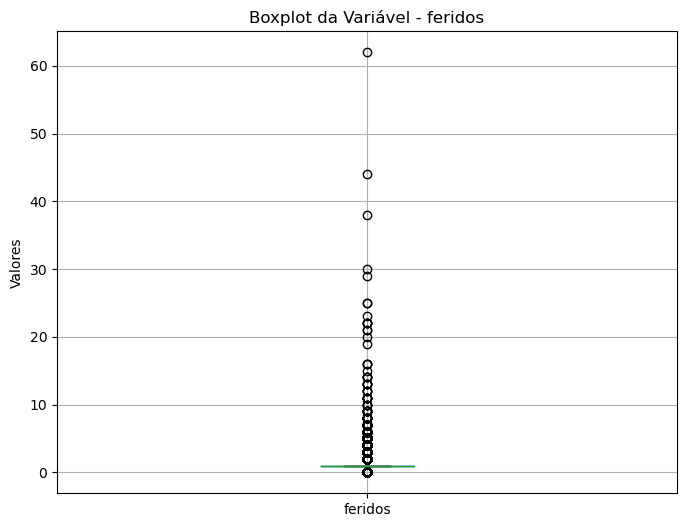

In [18]:
# Mostrar Box Plot para uma variável desejada
plt.figure(figsize=(8, 6))
df_prf_oco_01.boxplot(column='feridos')
plt.title('Boxplot da Variável - feridos')
plt.ylabel('Valores')
plt.show()

### Visão de distribuição dos dados

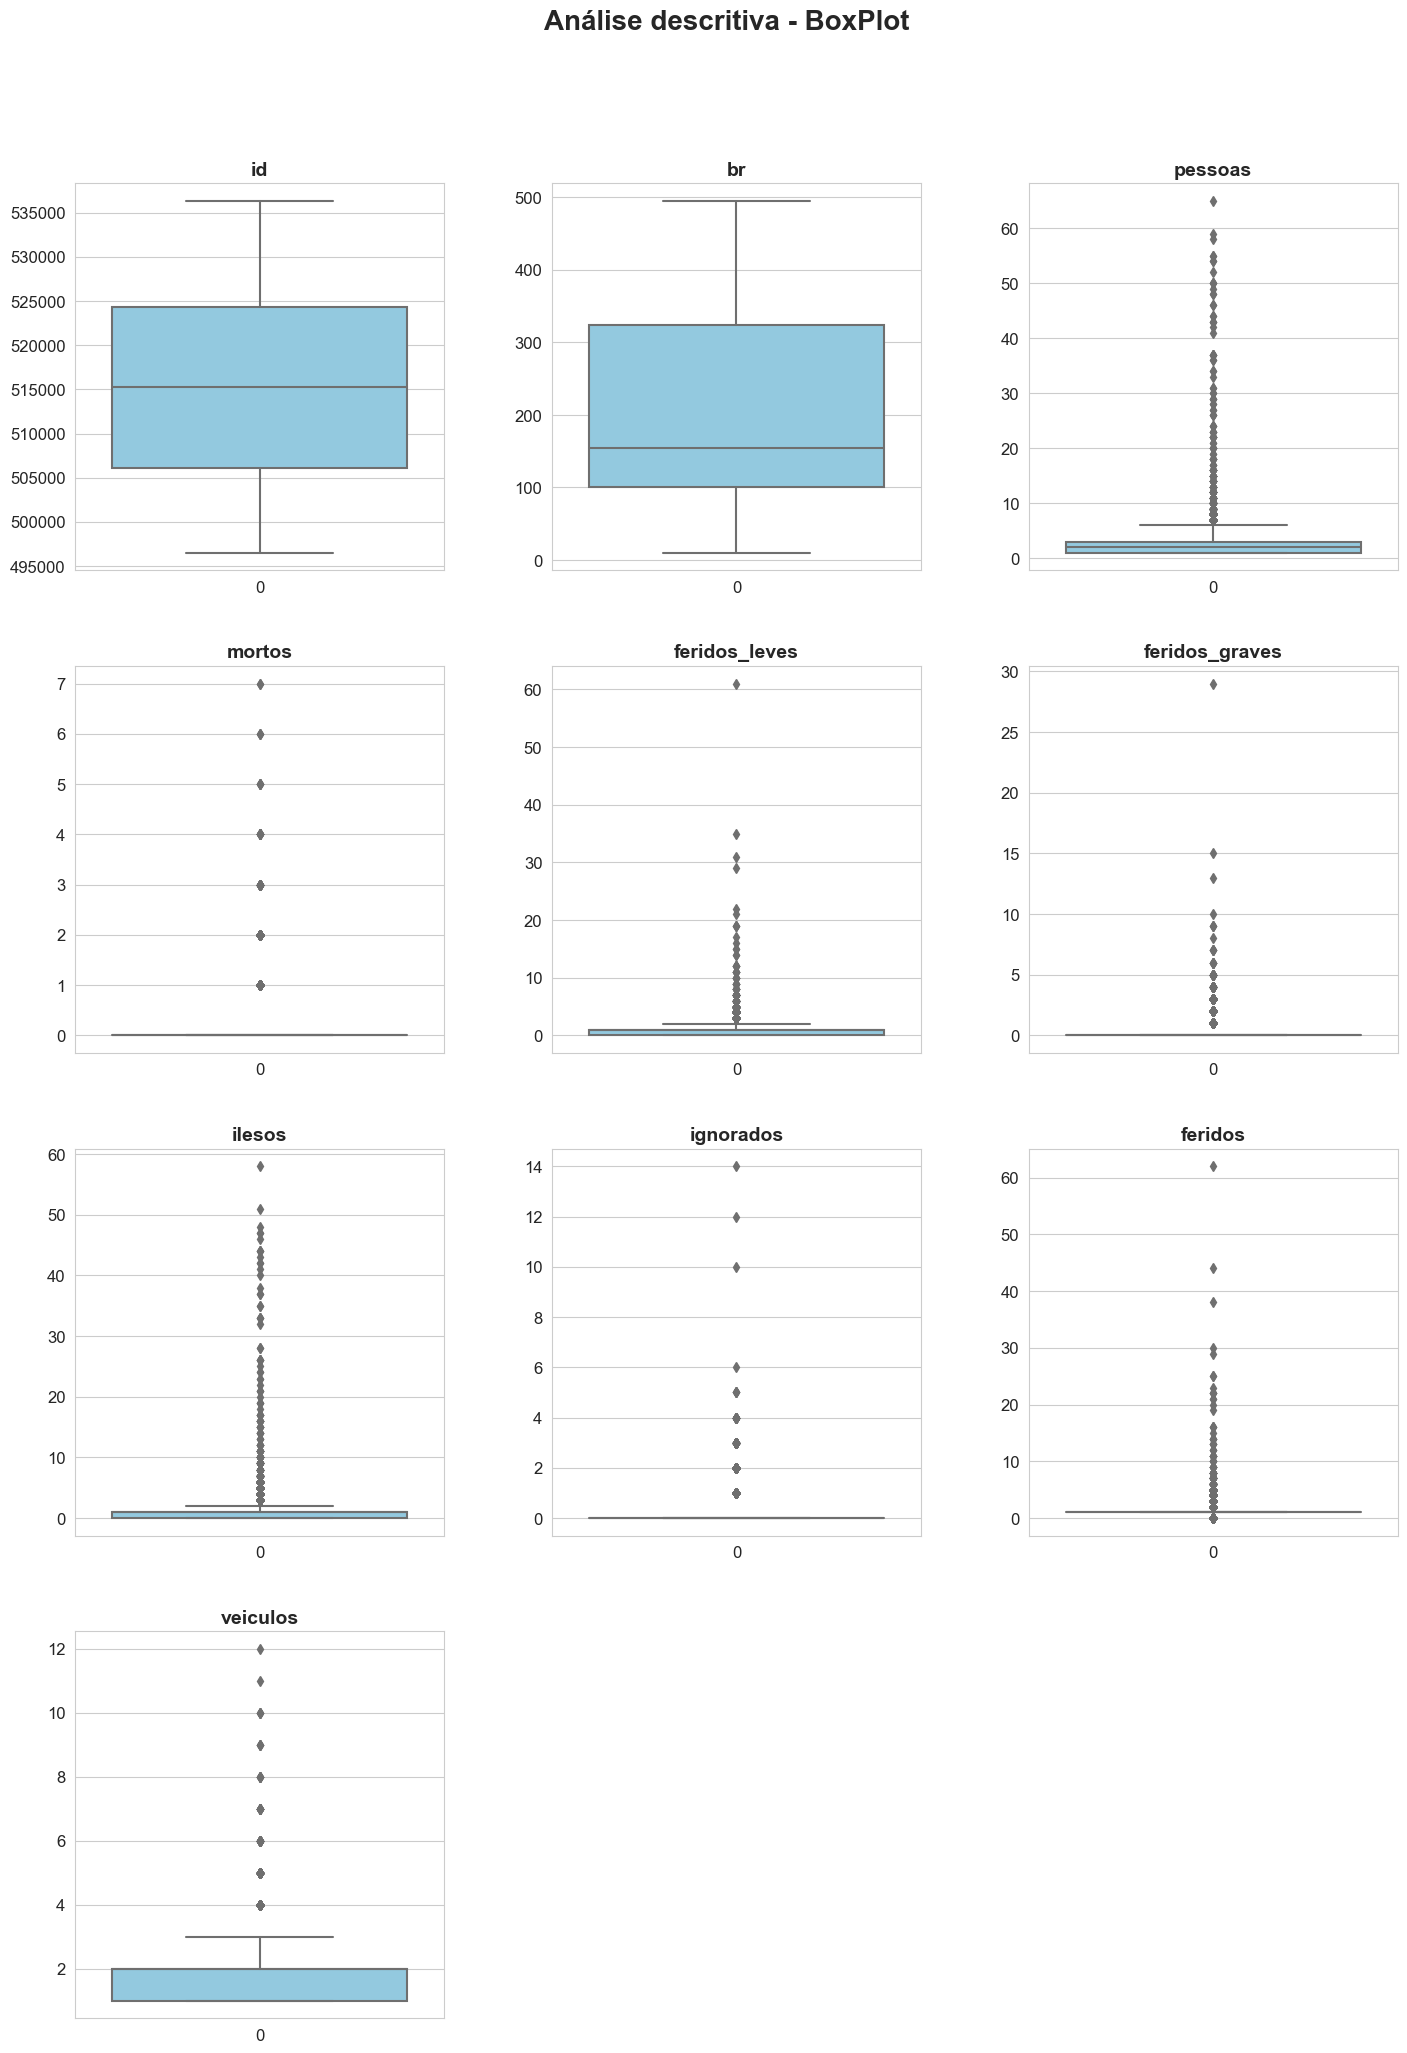

In [20]:
def box_plot(dataframe):
    """
    Plota boxplots estilizados com título simplificado para todas as variáveis numéricas do dataframe fornecido
    em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plotando os boxplots estilizados com títulos simplificados usando a função definida
box_plot(df_prf_oco_01)

**Variabilidade e Distribuição:**

- Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero, indicando que muitos incidentes envolvem poucas pessoas ou nenhuma vítima. No entanto, existem alguns valores atipicamente altos para estas variáveis, sugerindo que, embora raros, existem incidentes com um número significativo de envolvidos ou vítimas.

**Outliers**:

- Muitas das variáveis apresentam outliers. Estes são pontos que caem fora das "antenas" do boxplot e podem indicar valores atipicamente altos ou baixos. Por exemplo, a variável pessoas tem vários valores que são consideravelmente mais altos do que a mediana, sugerindo incidentes com um número anormalmente alto de pessoas envolvidas.
Os outliers podem indicar tanto erros de entrada de dados quanto eventos reais que são atípicos. Eles podem ser investigados mais a fundo para entender sua natureza.

**Concentração de Dados:**

- A linha central do box (mediana) para variáveis como mortos, feridos_leves, feridos_graves, e ilesos está no valor zero. Isso indica que a maioria dos incidentes não resulta em mortes ou ferimentos.

**Amplitude dos Dados:**

- O intervalo interquartil (IQR), que é a altura da caixa no boxplot, indica onde reside a metade central dos dados. Para muitas das variáveis, o IQR é pequeno, mostrando que os valores estão concentrados. Por outro lado, uma caixa maior indica maior variabilidade nos dados.

**Tendências e Anomalias:**

- Se os dados estivessem distribuídos em grupos ou categorias (como diferentes estados ou tipos de incidentes), poderíamos usar boxplots para comparar essas categorias e identificar tendências ou anomalias específicas de cada grupo.
Estes são insights gerais que podem ser obtidos a partir dos boxplots. Para insights mais específicos ou detalhados, seria útil combinar a análise visual dos boxplots com outras técnicas estatísticas e métodos de visualização.







## Análise de Dados com Histograma

Um histograma é uma representação gráfica que mostra a distribuição de um conjunto de dados. Ele é usado para visualizar a frequência de diferentes intervalos ou "bins" de valores em um conjunto de dados. Cada barra em um histograma representa a contagem (ou densidade) de dados dentro de um intervalo específico.

**Características-chave de um histograma:**

- Eixo X: Representa os intervalos ou "bins" dos dados.
- Eixo Y: Representa a frequência (contagem) de observações dentro de cada intervalo.
- Largura das Barras: Determina a faixa de valores dentro de cada intervalo ou "bin".
- Altura das Barras: Representa o número de observações dentro de cada intervalo.

**Aplicações interessantes para o histograma:**

- Visualizar a distribuição de dados.
- Identificar modas (picos) nos dados.
- Detectar assimetrias (dados inclinados para a esquerda ou direita).
- Identificar possíveis outliers.

**Considerando uma distribuição normal (gaussiana)**

A equação para uma distribuição normal é:

$ f(x | \mu, \sigma^2) = \frac{1}{{\sigma \sqrt{2\pi}}} e^{-\frac{1}{2} \left(\frac{x - \mu}{\sigma}\right)^2} $

Onde:

- $f(x | \mu, \sigma^2)$ é a função de densidade de probabilidade para um valor $x$.
- $\mu$ é a média da distribuição.
- $\sigma$ é o desvio padrão da distribuição.
- $\sigma^2$ é a variância da distribuição.
- $e$ é a base do logaritmo natural.

Para o nosso exemplo, usamos $\mu = 50$ e $\sigma = 15$. Portanto, a equação para a distribuição que geramos é:

$ f(x | 50, 15^2) = \frac{1}{{15 \sqrt{2\pi}}} e^{-\frac{1}{2} \left(\frac{x - 50}{15}\right)^2} $

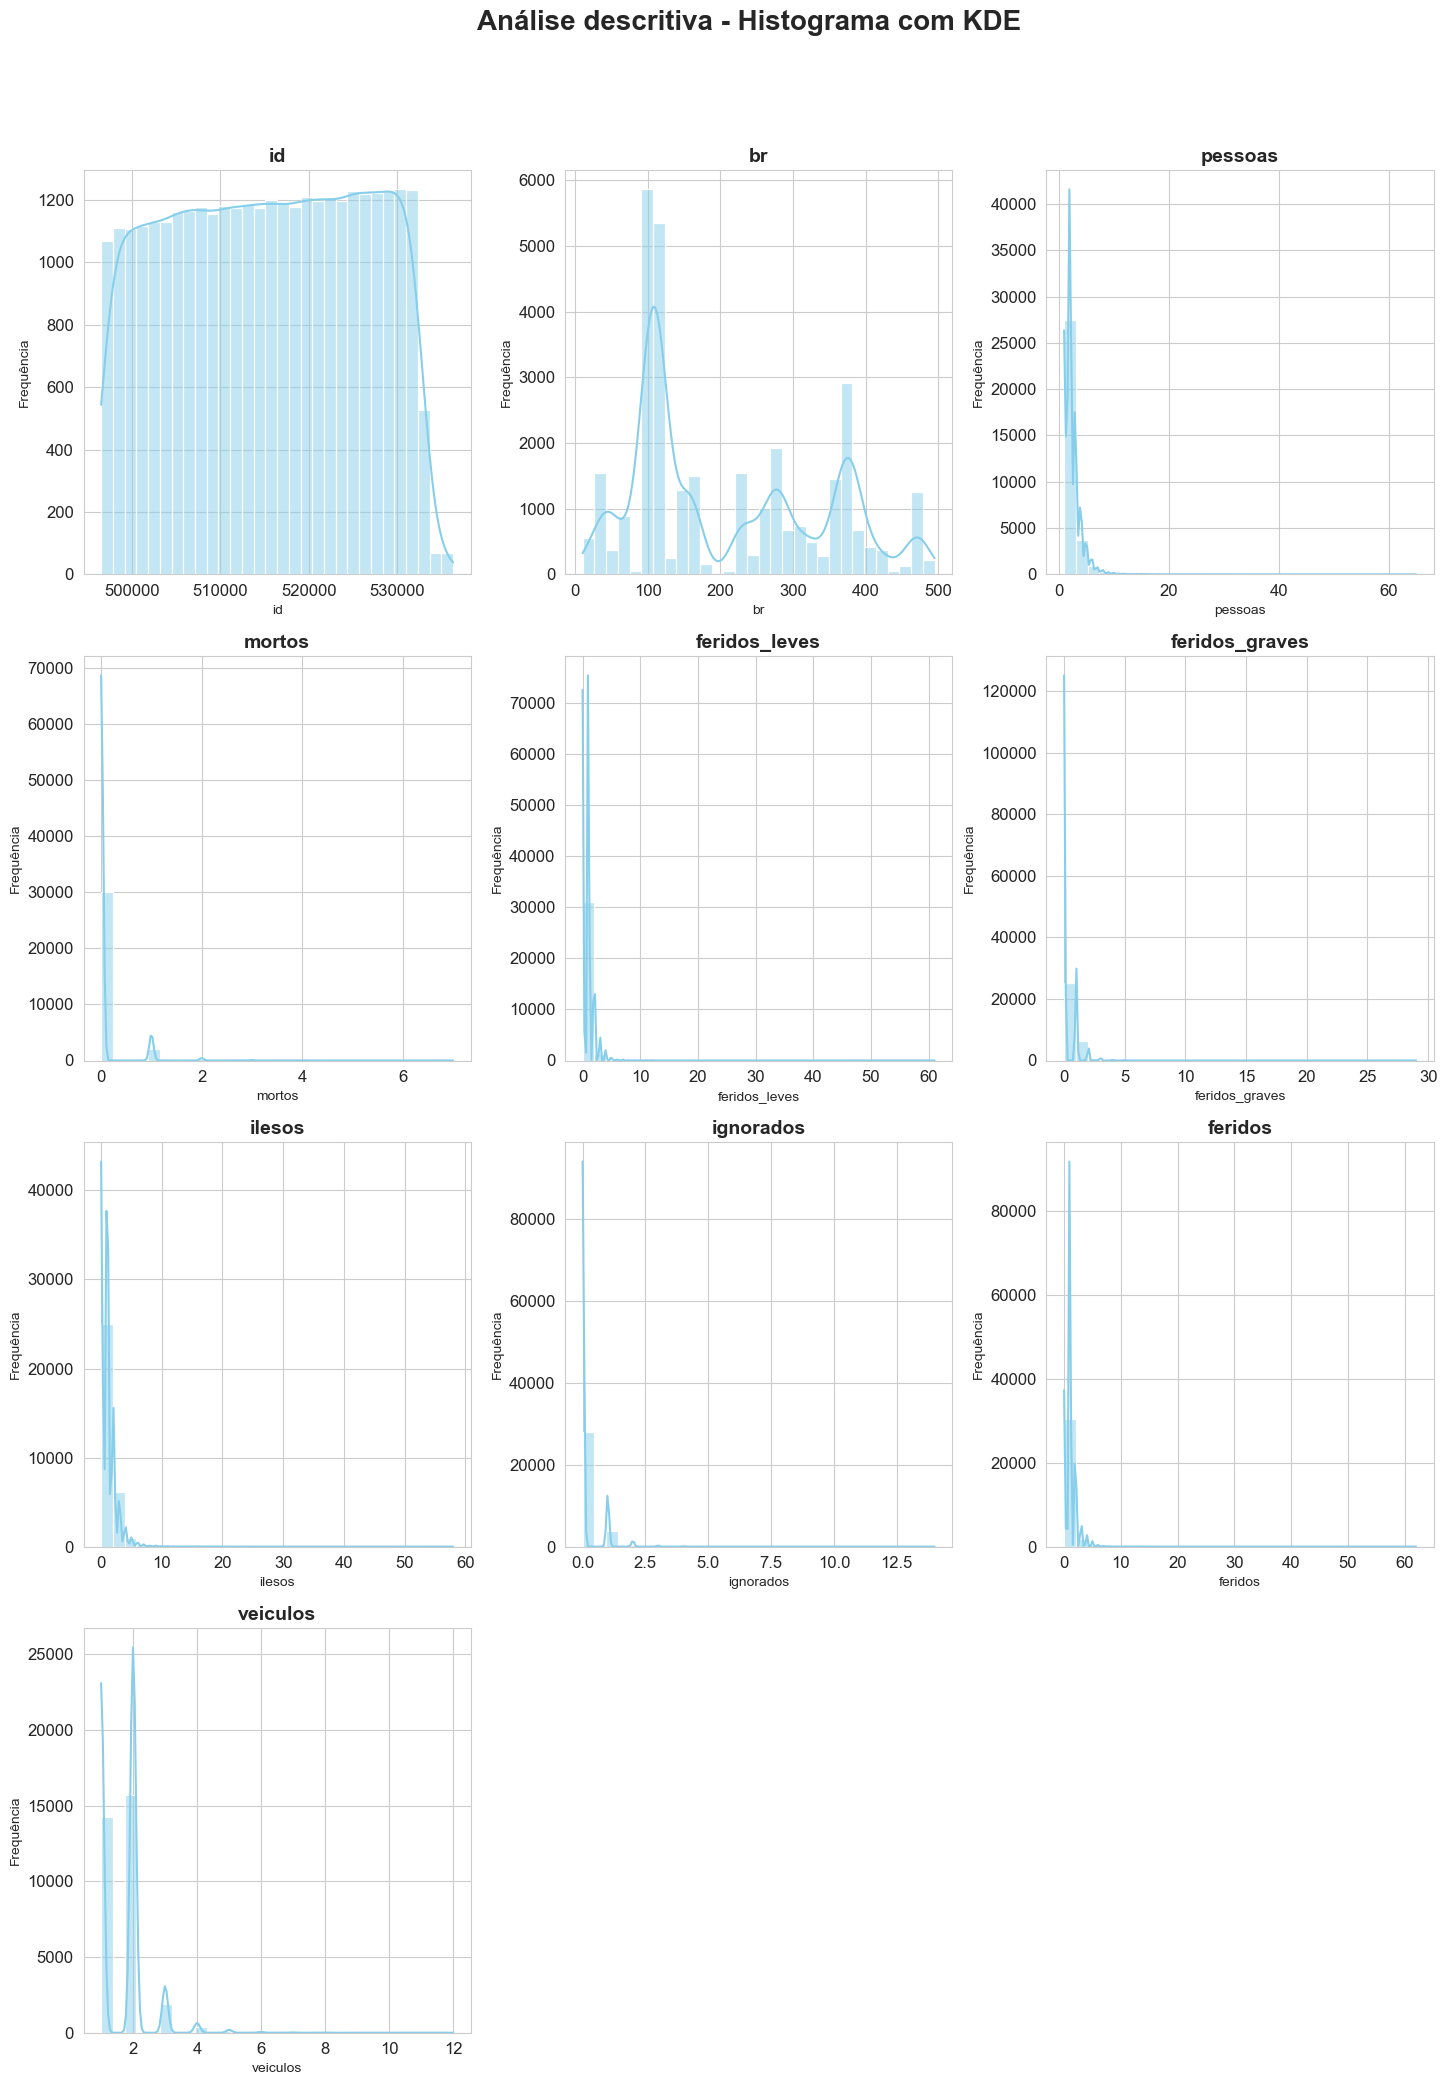

In [24]:
def histograms(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.05)

# Plotando os histogramas com KDE corrigidos em um painel usando a função definida
histograms(df_prf_oco_01)

**Distribuição**:
- Variáveis como pessoas, mortos, feridos_leves, feridos_graves, ilesos, ignorados e feridos têm a maioria de seus valores concentrados perto de zero. Isso é consistente com os boxplots.

**Modas:**
- A maioria das variáveis tem uma única moda, indicando uma distribuição unimodal. No entanto, se houvesse mais de um pico, isso indicaria uma distribuição bimodal ou multimodal.

**Assimetria:**
- Muitas das variáveis mostram uma assimetria positiva, com uma "cauda" à direita. Isso indica que a maioria dos incidentes envolve poucas pessoas ou tem poucas vítimas, mas há casos raros (outliers) com um número elevado de pessoas envolvidas ou vítimas.

**Outliers e Valores Atípicos:**
- Como os histogramas mostram a frequência de valores, é difícil identificar outliers diretamente. No entanto, a presença de uma "cauda" longa em um histograma pode indicar a presença de outliers.

**Concentração de Dados:**
- A altura das barras do histograma indica a frequência de valores. Assim, podemos ver que a maioria dos incidentes não resulta em mortes ou ferimentos graves.

## Gráfico de Barras:

Um **gráfico de barras** é uma ferramenta de visualização de dados usada para exibir e comparar a quantidade, frequência ou valores de diferentes categorias, usando barras retangulares de comprimentos proporcionais aos valores que representam. É uma maneira eficaz de apresentar dados categóricos.

### Características principais:

1. **Eixo X**: Geralmente representa as categorias que estão sendo comparadas.
2. **Eixo Y**: Mostra a escala dos valores, que pode ser uma contagem, uma porcentagem ou qualquer outra métrica numérica.
3. **Barras**: Cada barra representa uma categoria. A altura (ou comprimento, em gráficos de barras horizontais) da barra é proporcional ao valor da categoria que ela representa.

### Quando usar:

1. **Comparando Dados Categóricos**: Gráficos de barras são ideais para comparar várias categorias de dados. Por exemplo, você pode usar um gráfico de barras para comparar as vendas de diferentes produtos em uma loja.
  
2. **Visualizando Distribuições de Frequência**: Se você deseja mostrar a frequência de ocorrências de diferentes categorias, um gráfico de barras é uma boa escolha. Por exemplo, mostrar a distribuição de alunos em diferentes faixas de notas.

3. **Comparando Dados ao Longo do Tempo**: Embora gráficos de linhas sejam mais comuns para séries temporais, gráficos de barras podem ser úteis para mostrar mudanças discretas ao longo do tempo, especialmente se os pontos no tempo não forem contínuos (por exemplo, trimestres de um ano).

### Diferença entre Gráficos de Barras e Histogramas:

Muitas vezes, as pessoas confundem gráficos de barras com histogramas, mas eles têm propósitos diferentes:

- **Gráficos de Barras**: Usados para comparar quantidades de diferentes categorias.
- **Histogramas**: Usados para mostrar a distribuição de um conjunto de dados contínuos, dividindo-o em bins ou intervalos.

### Considerações ao criar Gráficos de Barras:

1. **Ordem das Barras**: Em muitos casos, é útil ordenar as barras em ordem decrescente ou de acordo com algum critério específico.
2. **Evitar Barras Demasiado Finas ou Muitas Categorias**: Isso pode tornar o gráfico difícil de ler ou interpretar.
3. **Rótulos Claros**: Assegure-se de que cada barra tenha um rótulo claro e que o eixo Y também esteja claramente rotulado com o que está sendo medido.
4. **Uso de Cores**: As cores podem ser usadas para destacar certas barras ou para categorizar barras em grupos.

Em resumo, gráficos de barras são uma ferramenta poderosa e versátil para visualizar e comparar dados categóricos. Eles são intuitivos, fáceis de ler e podem ser usados em uma variedade de contextos, desde relatórios empresariais até pesquisas científicas.

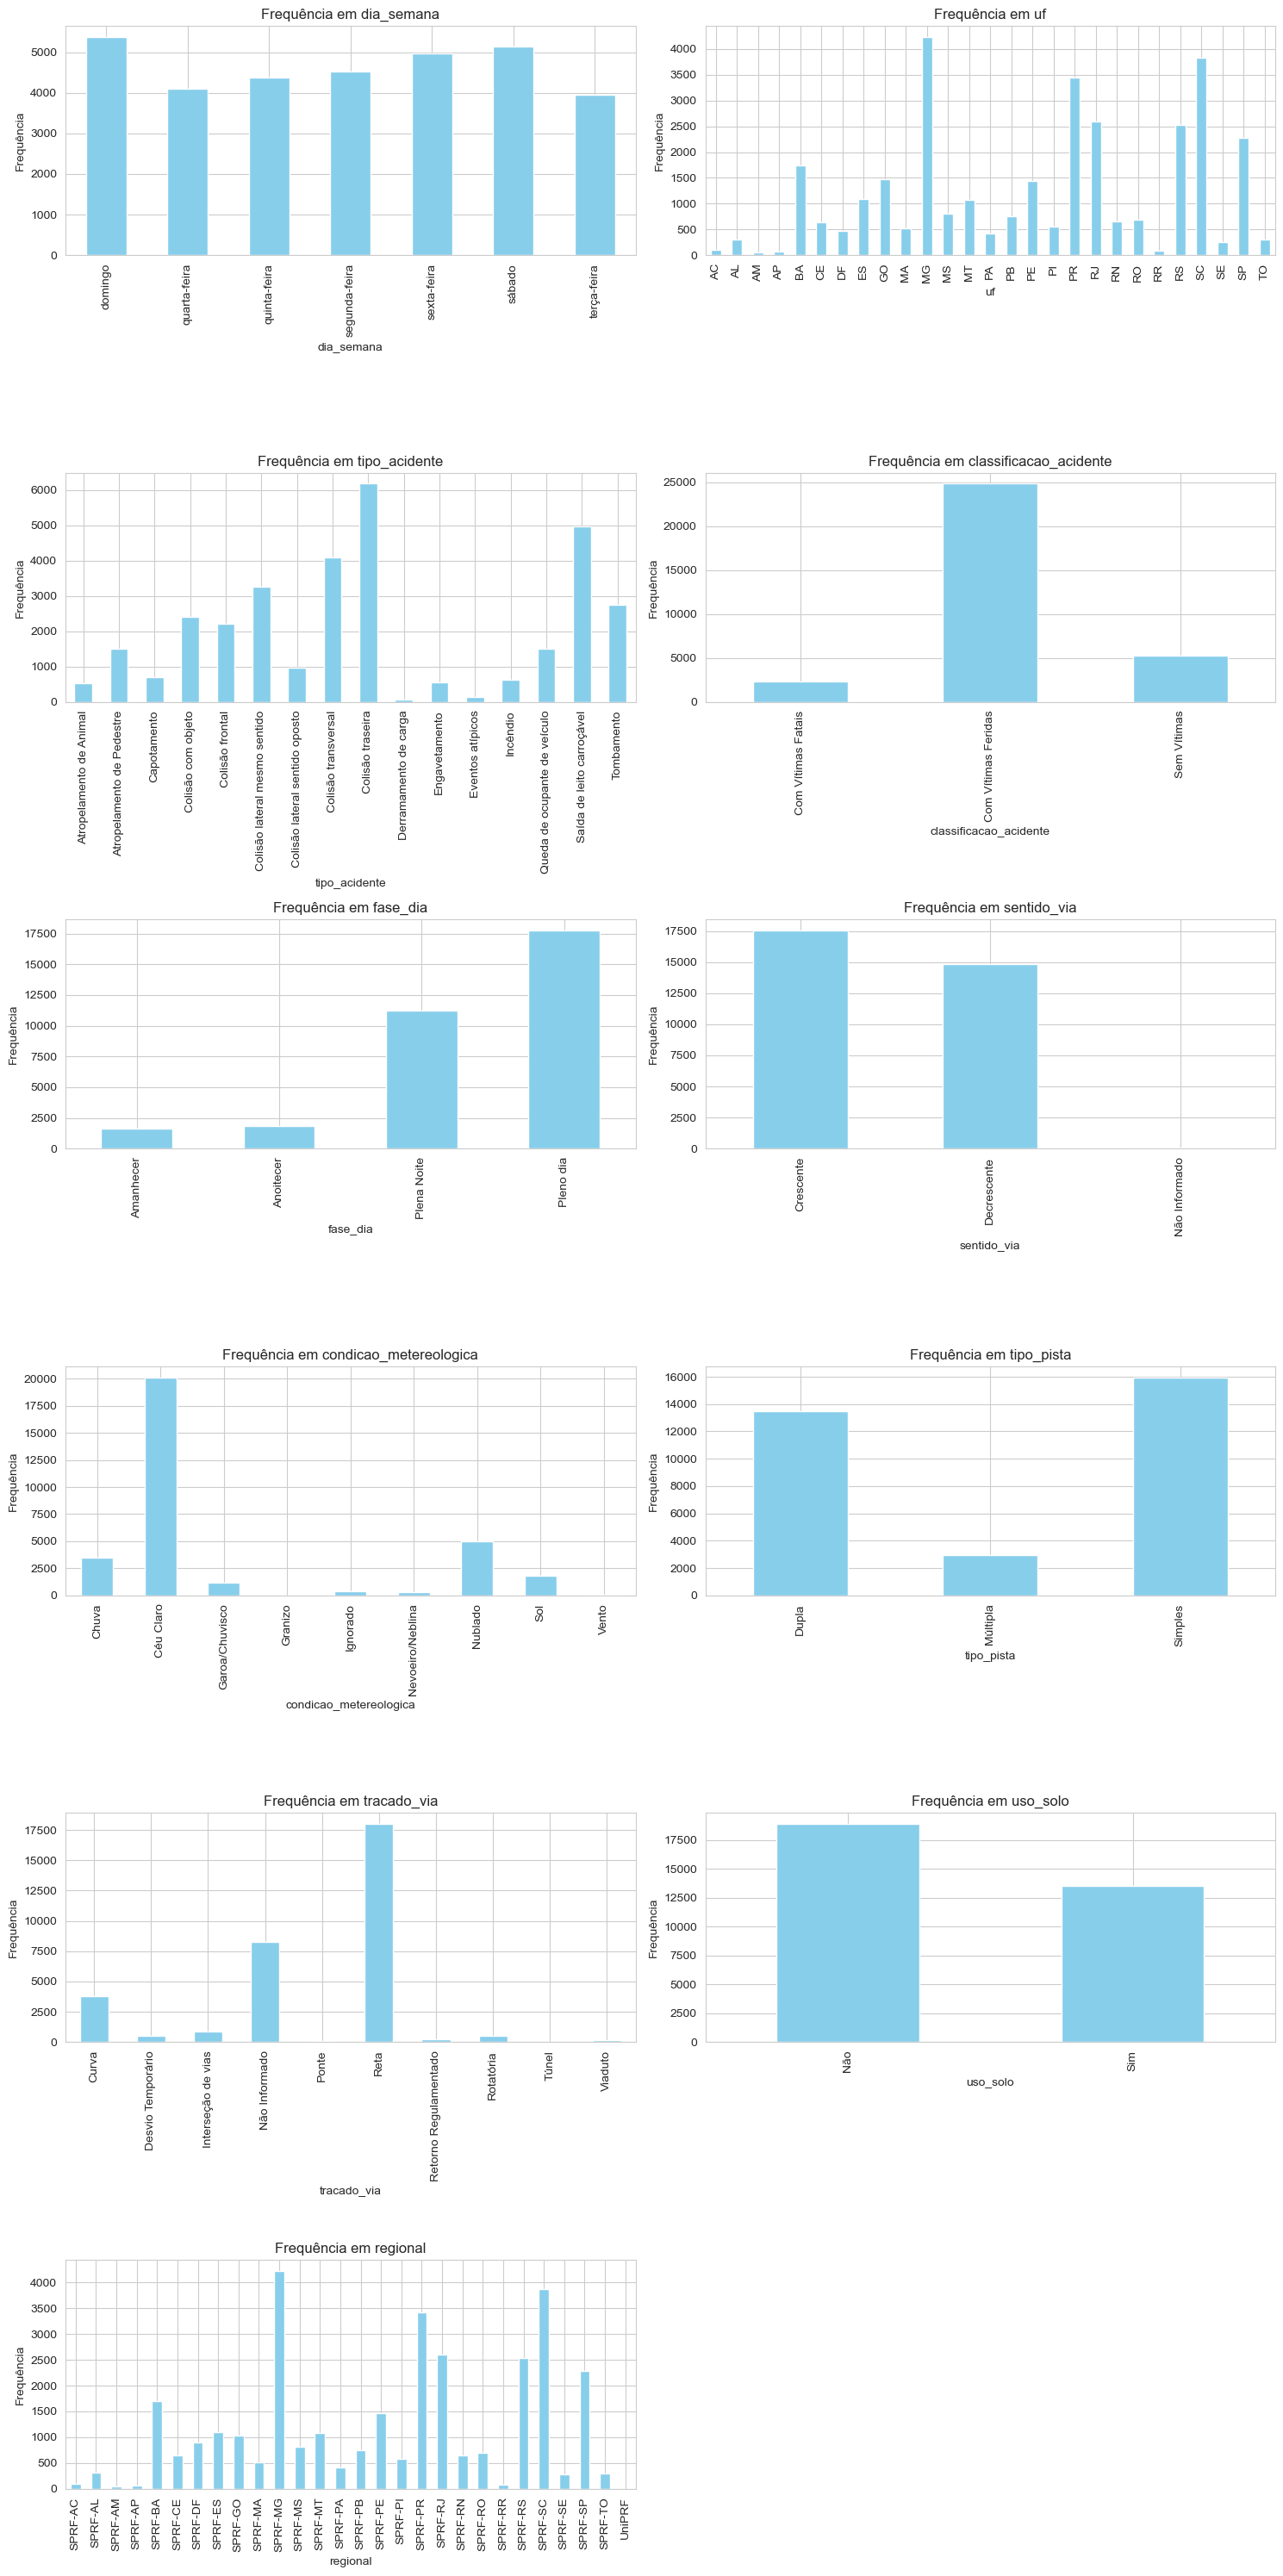

In [25]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(15, 5 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

# Testa a função com os dados e o corte padrão de cardinalidade
plot_categorical_frequency_pt(df_prf_oco_01, corte_cardinalidade=30, graficos_por_linha=2)


**Dias da Semana (dia_semana)**:
- A maioria dos registros parece ocorrer nos finais de semana (sábado e domingo). Isso pode indicar um aumento de atividades ou eventos que resultam em mais registros nesses dias.

**UF (Estados)**:
- Alguns estados têm uma contagem mais alta de registros em comparação com outros. É essencial considerar a população e o tamanho de cada estado ao interpretar esses dados. Por exemplo, estados mais populosos ou com maiores redes rodoviárias podem naturalmente ter mais registros.

**Causa do Acidente (causa_acidente)**:
- Alguns motivos parecem ser mais predominantes que outros. Por exemplo, "Falta de atenção" e "Desobediência às normas de trânsito" parecem ser causas comuns, o que pode indicar a necessidade de campanhas de conscientização.

C**lassificação do Acidente (classificacao_acidente)**:
- A maioria dos acidentes parece ser sem vítimas ou com feridos leves, o que é uma boa notícia. No entanto, ainda há uma quantidade significativa de acidentes com feridos graves e mortos, ressaltando a importância da segurança no trânsito.

**Fase do Dia (fase_dia)**:
- Os acidentes parecem ser mais comuns durante o dia, com picos no amanhecer e anoitecer. Isso pode estar relacionado às horas de pico de tráfego ou à visibilidade reduzida.

**Condição Meteorológica (condicao_metereologica)**:
- A maioria dos registros ocorre em condições claras, o que é esperado, mas também destaca que condições adversas, como chuva ou neblina, não são os principais contribuintes para os acidentes, embora possam aumentar sua gravidade.

**Tipo de Pista (tipo_pista)**:
- A maioria dos registros ocorre em pistas simples, o que pode indicar que essas pistas apresentam mais riscos ou que são mais comuns nas áreas abrangidas pelos dados.

# Análise gográfica com mapas

In [27]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/cb/7b/2fb6ab376c78d2e60812ad0bf4b24889309d2aeb543f54efcd586c69907f/geopandas-0.13.2-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.19 from https://files.pythonhosted.org/packages/b0/7f/2de46a2630f609b7520d74ffc7692d4969b1fa1dd3c82f62c7967183d365/Fiona-1.9.4.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     ---------------------------------------- 50.6/50.6 kB 1.3 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.0.1 from https://files.pythonhosted.org/packages/c8/5a/215a1894e50167d91b471d8fc413ca30034c48e5d3dfac78d12df4c840d5/pyproj-3.6.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ----- ---------------------------------- 0.2/1.4 MB 5.3 MB/s eta 0:00:01
     ------------------ --------------------- 0.6/1.4 MB 9.9 MB/

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16892\2726711849.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

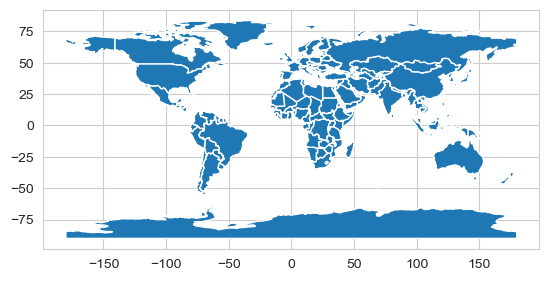

In [28]:
import geopandas as gpd

# Carregar o conjunto de dados naturalearth_lowres
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Visualizar o mapa do mundo
world.plot()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16892\2779992026.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

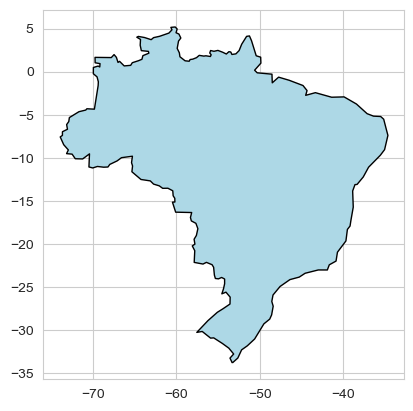

In [29]:
import geopandas as gpd

# Carregar o conjunto de dados e filtrar pelo Brasil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world['name'] == 'Brazil']

# Plotar o Brasil
brazil.plot(color='lightblue', edgecolor='black')

Text(-42.6729, -22.9068, 'Rio de Janeiro')

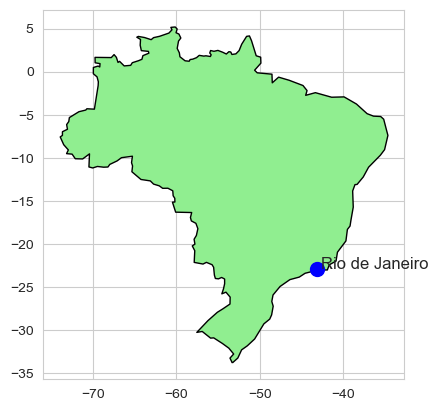

In [31]:
import matplotlib.pyplot as plt

# Coordenadas do Rio de janeiro
rj_coords =  (-43.1729, -22.9068)

fig, ax = plt.subplots()
brazil.plot(ax=ax, color='lightgreen', edgecolor='black')
ax.scatter(rj_coords[0], rj_coords[1], color='blue', s=100)
ax.text(rj_coords[0] + 0.5, rj_coords[1], 'Rio de Janeiro', fontsize=12, ha='left')



C:\Users\Usuario\AppData\Local\Temp\ipykernel_16892\2485610851.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


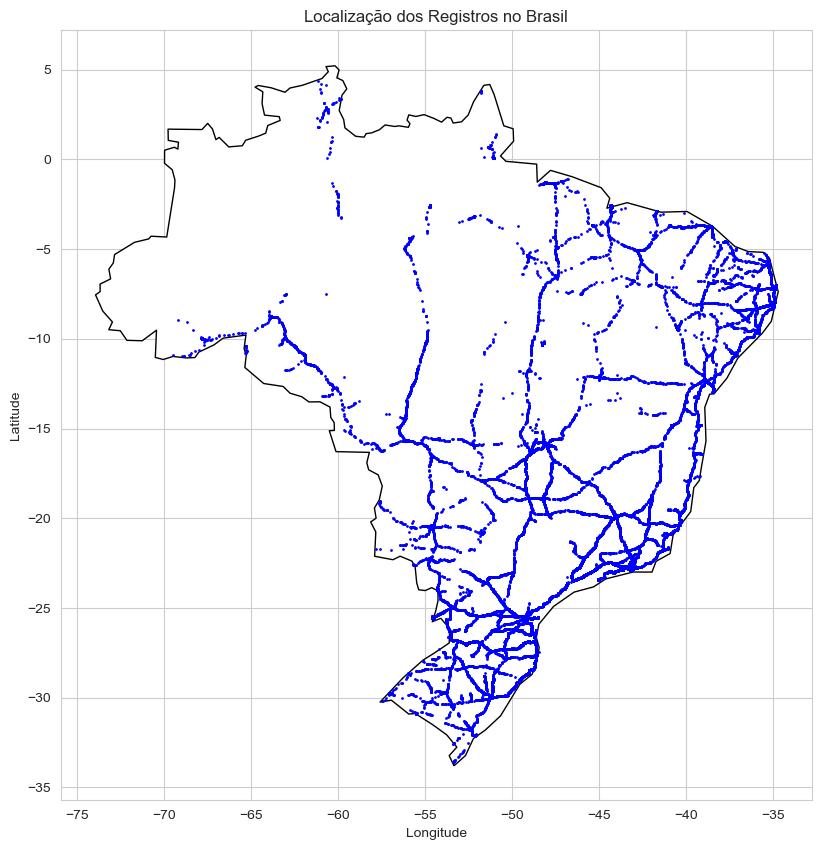

In [32]:
# Usando cordenadas geográficas para plotar no mapa do Brasil

# https://geopandas.org/en/stable/
import geopandas as gpd
import matplotlib.pyplot as plt

# Carrega o mapa do Brasil
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
brazil = world[world.name == "Brazil"]
data = df_prf_oco_01
data_map = data.dropna(subset=['latitude', 'longitude'])

# Convertendo 'latitude' e 'longitude' para fomrato correto
data_map['latitude'] = data_map['latitude'].str.replace(',', '.').astype(float)
data_map['longitude'] = data_map['longitude'].str.replace(',', '.').astype(float)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))
brazil.plot(ax=ax, color='white', edgecolor='black')
ax.scatter(data_map['longitude'], data_map['latitude'], color='blue', s=1)
plt.title('Localização dos Registros no Brasil')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [34]:
pip install folium


     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
import folium

# Sample a subset of the data to ensure performance
sample_data = data_map.sample(min(1000, len(data_map)))

# Create a base map centered around Brazil
m = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Centered around Brasília

# Add markers for each record in the sample data
for idx, row in sample_data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['causa_acidente'],
        icon=folium.Icon(icon="circle", color="blue", prefix='fa')
    ).add_to(m)

m


In [37]:
# Create a new base map centered around Brazil
m_corrected = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)  # Centered around Brasília

# Add markers for each record in the sample data with special markers for fatal accidents
for idx, row in sample_data.iterrows():
    if "Com Vítimas Fatais" in row['classificacao_acidente']:
        icon_color = "red"
        icon_type = "times"
        folium.Marker(
            location=[row['latitude'], row['longitude']],
            popup=row['causa_acidente'],
            icon=folium.Icon(icon=icon_type, color=icon_color, prefix='fa')
        ).add_to(m_corrected)
    else:
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            color="blue",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6
        ).add_to(m_corrected)

m_corrected


In [48]:
tipo_latitude = data['latitude'].dtype
tipo_longitude = data['longitude'].dtype

print(f'Tipo de dados da coluna "latitude": {tipo_latitude}')
print(f'Tipo de dados da coluna "longitude": {tipo_longitude}')

Tipo de dados da coluna "latitude": float64
Tipo de dados da coluna "longitude": float64


In [51]:
import folium
from folium import plugins

# Create a basic map centered around Brazil
m_heatmap = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# Add the heat layer
heat_data = [[row['latitude'], row['longitude']] for index, row in data.iterrows()]
plugins.HeatMap(heat_data).add_to(m_heatmap)

m_heatmap




In [53]:
from folium.plugins import MarkerCluster

# Criar um mapa básico centrado no Brasil
m_cluster = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# Adicionar clusters
marker_cluster = MarkerCluster().add_to(m_cluster)
for idx, row in data.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']], popup=row['causa_acidente']).add_to(marker_cluster)

m_cluster.save('clusters.html')


In [54]:
# # Criar um mapa básico centrado no Brasil
# m_popup = folium.Map(location=[-15.77972, -47.92972], zoom_start=4)

# # Adicionar marcadores com pop-ups ricos
# for idx, row in data.iterrows():
#     popup_content = f"""
#     <strong>Causa:</strong> {row['causa_acidente']}<br>
#     <strong>Tipo de Pista:</strong> {row['tipo_pista']}<br>
#     <strong>Condição Meteorológica:</strong> {row['condicao_metereologica']}
#     """
#     folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_content).add_to(m_popup)

# m_popup.save('rich_popups.html')
